# Assignment

Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines_df = pd.read_excel('Airlines+Data.xlsx')
airlines_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airlines_df.shape

(96, 2)

In [4]:
airlines_df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines_df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airlines_df_1 = airlines_df.set_index('Month')
airlines_df_1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot: xlabel='Month'>

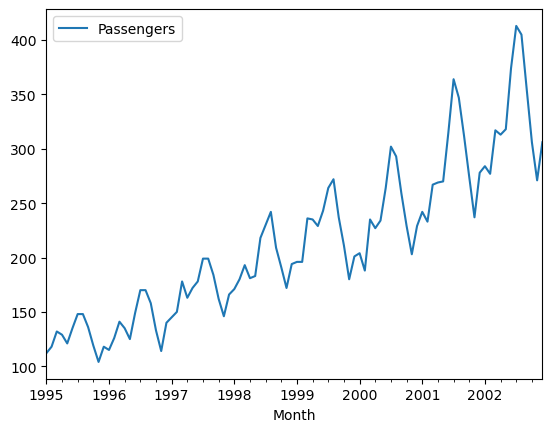

In [8]:
airlines_df_1.plot()

array([[<AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

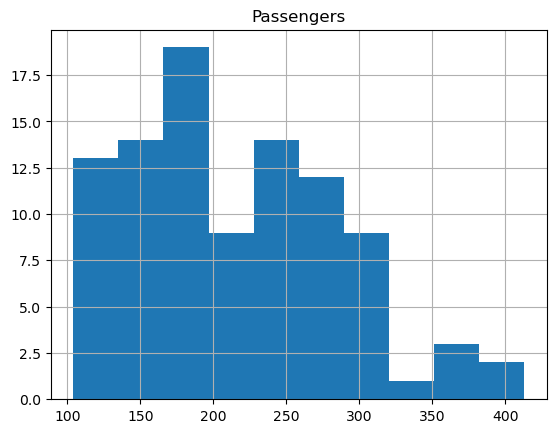

In [9]:
airlines_df_1.hist()

<AxesSubplot: ylabel='Density'>

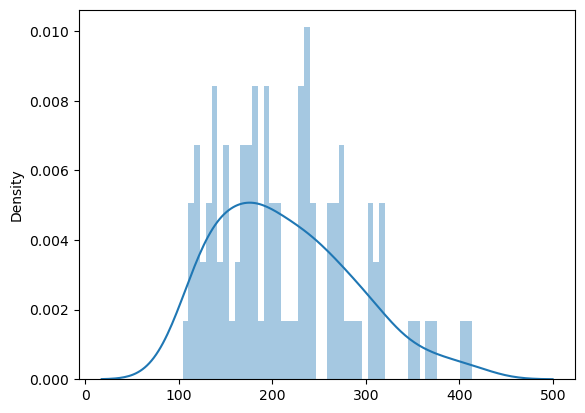

In [10]:
sns.distplot(airlines_df_1,bins=50)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

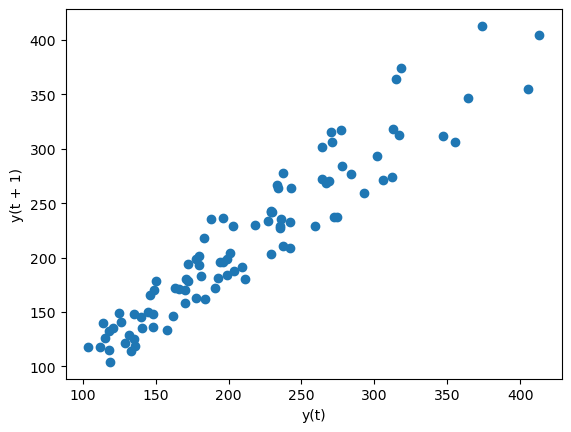

In [11]:
lag_plot(airlines_df_1)

In [12]:
#Extracting month and year into separate columns
airlines_data = airlines_df.copy()
airlines_data['month'] = airlines_data.Month.dt.strftime("%b")
airlines_data['year'] = airlines_data.Month.dt.strftime("%Y")
airlines_data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<AxesSubplot: xlabel='month', ylabel='Passengers'>

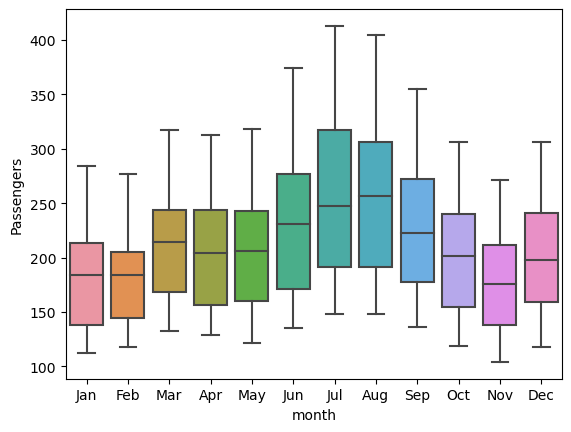

In [13]:
sns.boxplot(x='month',y='Passengers',data=airlines_data)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

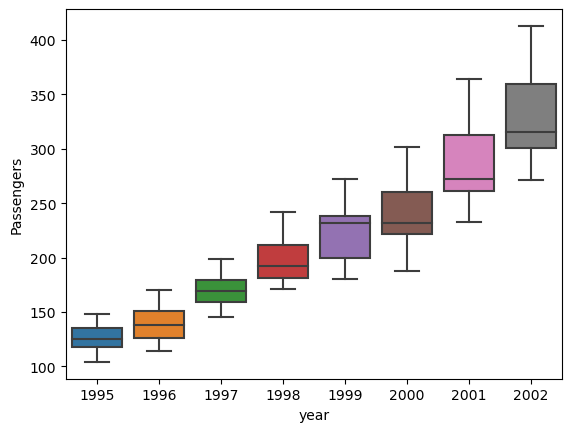

In [14]:
sns.boxplot(x='year',y='Passengers',data=airlines_data)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

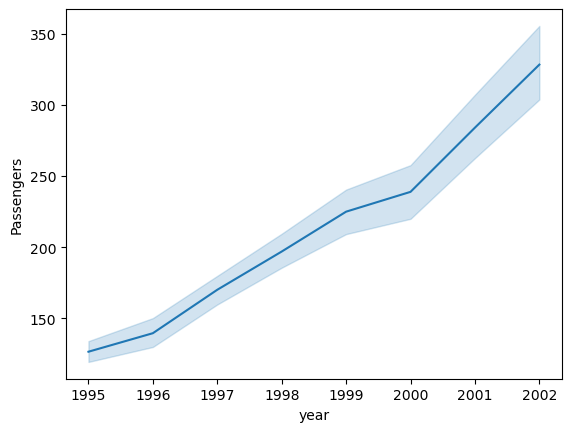

In [15]:
#lineplot
sns.lineplot(x='year',y='Passengers',data=airlines_data)

<AxesSubplot: xlabel='month', ylabel='Passengers'>

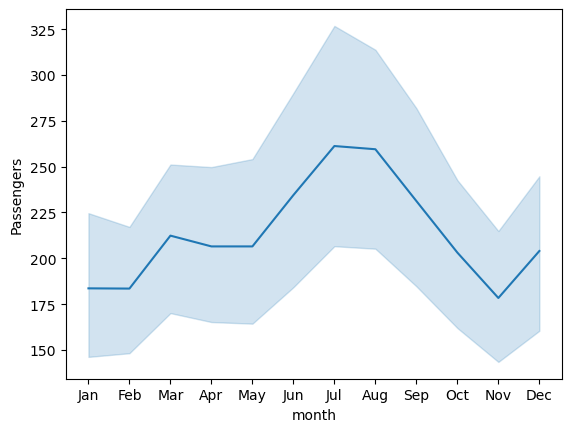

In [16]:
sns.lineplot(x='month',y='Passengers',data=airlines_data)

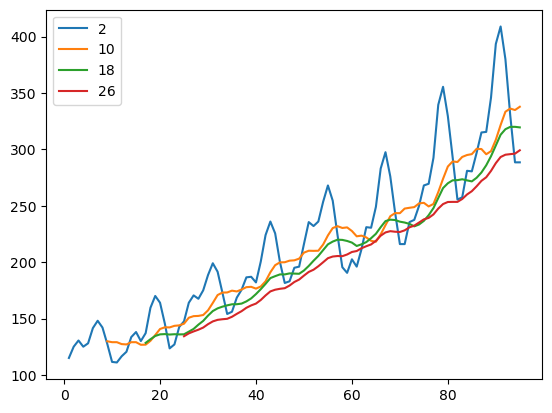

In [17]:
#Moving Average
for i in range(2,30,8):
    airlines_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

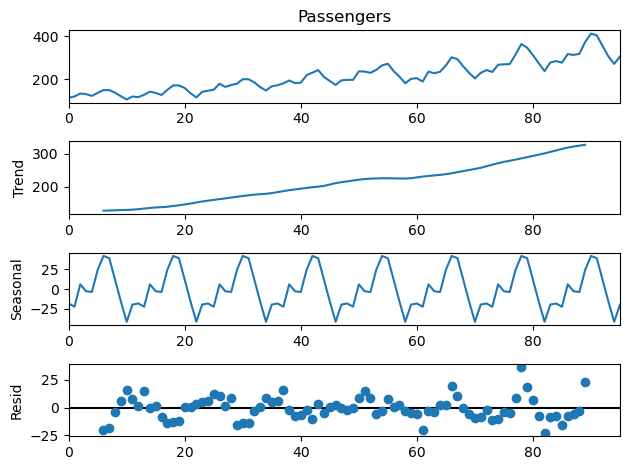

In [18]:
#TimeSeries Decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

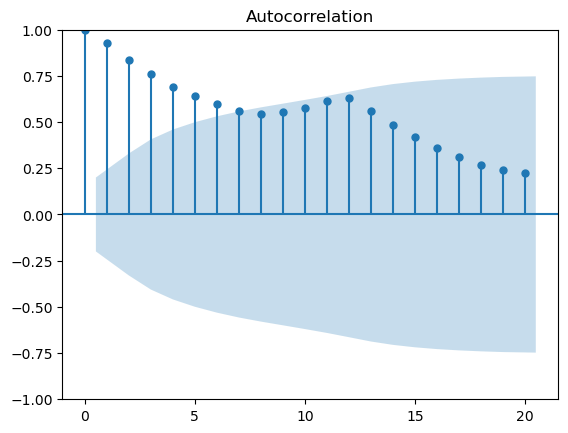

In [19]:
#ACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(airlines_data['Passengers'])

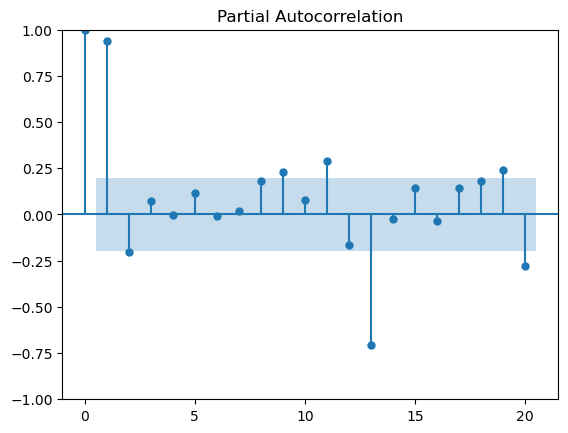

In [20]:
#PACF plot
pacf = plot_pacf(airlines_data['Passengers'])

In [21]:
airlines_data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [22]:
#Creating dummy values for month
airlines_data['year'] = airlines_data['year'].astype('int64')

In [23]:
airlines_data_1 = pd.get_dummies(airlines_data)

In [24]:
airlines_data_1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
x = np.arange(1,97)

In [26]:
#timesteps 
t = pd.Series(data=x)
t

0      1
1      2
2      3
3      4
4      5
      ..
91    92
92    93
93    94
94    95
95    96
Length: 96, dtype: int64

In [27]:
t_sqr = pd.Series(data=(x*x))
t_sqr

0        1
1        4
2        9
3       16
4       25
      ... 
91    8464
92    8649
93    8836
94    9025
95    9216
Length: 96, dtype: int64

In [28]:
#log of no_of_passengers
airlines_data_1['log_passengers'] = np.log(airlines_data_1['Passengers'])
airlines_data_1['t'] = t
airlines_data_1['t_sqr'] = t_sqr

In [29]:
airlines_data_1.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3,9
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,5,25


In [30]:
#Splitting the data
train = airlines_data_1[:84]
test = airlines_data_1[84:]

In [31]:
train

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3,9
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,2001,0,1,0,0,0,0,0,0,0,0,0,0,5.849325,80,6400
80,2001-09-01,312,2001,0,0,0,0,0,0,0,0,0,0,0,1,5.743003,81,6561
81,2001-10-01,274,2001,0,0,0,0,0,0,0,0,0,0,1,0,5.613128,82,6724
82,2001-11-01,237,2001,0,0,0,0,0,0,0,0,0,1,0,0,5.468060,83,6889


Model Building

In [32]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [33]:
#Building Linear Model
import statsmodels.formula.api as smf

model_linear = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(model_linear.predict(pd.DataFrame(test['t'])))                                              #predict on test data   
mae_linear = MAE(test['Passengers'],pred_linear)                                                                     #calculate eoot mean sqr error 
mae_linear

0.12875898544471479

In [34]:
#Exponential
model_exp = smf.ols('log_passengers~t',data=train).fit()
pred_exp = pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
mae_exp = MAE(test['Passengers'], np.exp(pred_exp))
mae_exp

0.11102459391985826

In [35]:
#Quadratic 
model_quad = smf.ols('Passengers~t+t_sqr',data=train).fit()
pred_quad = pd.Series(model_quad.predict(test[["t","t_sqr"]]))
mae_quad = MAE(test['Passengers'],pred_quad)
mae_quad

0.11838168080315846

In [36]:
#Additive seasonality 
model_add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=train).fit()
pred_add_sea = pd.Series(model_add_sea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
mae_add_sea = MAE(test['Passengers'],pred_add_sea)
mae_add_sea

0.6601957591766388

In [37]:
#Additive Seasonality Quadratic 
model_add_sea_quad = smf.ols('Passengers~t+t_sqr+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=train).fit()
pred_add_sea_quad = pd.Series(model_add_sea_quad.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_sqr']]))
mae_add_sea_quad = MAE(test['Passengers'], pred_add_sea_quad)
mae_add_sea_quad

0.055710861779884456

In [38]:
##Multiplicative Seasonality
model_mult_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = train).fit()
pred_mult_sea = pd.Series(model_mult_sea.predict(test))
mae_mult_sea = MAE(test['Passengers'], np.exp(pred_mult_sea))
mae_mult_sea

0.7218240575033885

In [39]:
#Multiplicative Additive Seasonality 

model_Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(model_Mul_Add_sea.predict(test))
mae_Mult_add_sea = MAE(test['Passengers'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.024187475026050762

Forecasing by Data driven Model

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [41]:
airlines_data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [42]:
Train = airlines_data.head(84)
Test = airlines_data.tail(12)

In [43]:
#Simple Exponential method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test.Passengers) 
MAE_ses

0.1341127474051382

In [44]:
#Hotl method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Passengers) 
MAE_hw

0.23530719652100496

In [45]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test.Passengers) 
MAE__hwe_add_add

0.05729920281996286

In [46]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Passengers)
MAE__hwe_mul_add

0.028208437891420583

#Forecasting by ARIMA Model

In [47]:
airlines_df_1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [48]:
# separate out a validation dataset
split_point = len(airlines_df_1) - 12
dataset, validation = airlines_df_1[0:split_point], airlines_df_1[split_point:]

In [49]:
len(dataset)

84

In [50]:
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [51]:
from sklearn.metrics import mean_squared_error
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
MAE_base = MAE(predictions, test)
print('MAE_base: %.3f' % MAE_base)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [52]:
#Sarima Model
airlines_df_1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [53]:
#performing test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [54]:
adf_test(airlines_df_1['Passengers'])

ADF Statistics: 1.3402479596467032
p- value: 0.9968250481137263
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [55]:
## Use Techniques Differencing 1st time
airlines_df_1['Passengers First Difference']=airlines_df_1['Passengers']-airlines_df_1['Passengers'].shift(12)

In [56]:
adf_test(airlines_df_1['Passengers First Difference'].dropna())

ADF Statistics: -2.6900043838623167
p- value: 0.07578397625851754
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [57]:
airlines_df_1['Passengers Second Difference']=airlines_df_1['Passengers First Difference']-airlines_df_1['Passengers First Difference'].shift(12)

In [58]:
adf_test(airlines_df_1['Passengers Second Difference'].dropna())

ADF Statistics: -2.1094801421381826
p- value: 0.24071971540603815
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [59]:
## Use Techniques Differencing 2nd time
airlines_df_1['Passengers Third Difference']=airlines_df_1['Passengers Second Difference']-airlines_df_1['Passengers Second Difference'].shift(12)

In [60]:
airlines_df_1.iloc[30:40]

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers Third Difference
Month,,,,
1997-07-01,199,29.0,7.0,NaN
1997-08-01,199,29.0,7.0,NaN
1997-09-01,184,26.0,4.0,NaN
1997-10-01,162,29.0,15.0,NaN
1997-11-01,146,32.0,22.0,NaN
1997-12-01,166,26.0,4.0,NaN
1998-01-01,171,26.0,-4.0,-31.0
1998-02-01,180,30.0,6.0,-10.0
1998-03-01,193,15.0,-22.0,-50.0


In [61]:
adf_test(airlines_df_1['Passengers Third Difference'].dropna())

ADF Statistics: -4.89382405549013
p- value: 3.585265761394368e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


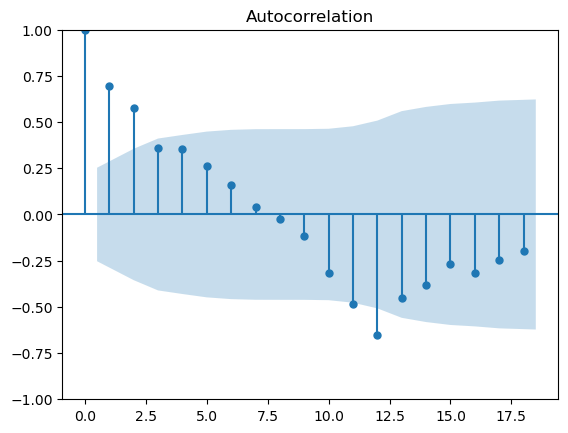

In [62]:
acf = plot_acf(airlines_df_1["Passengers Third Difference"].dropna())

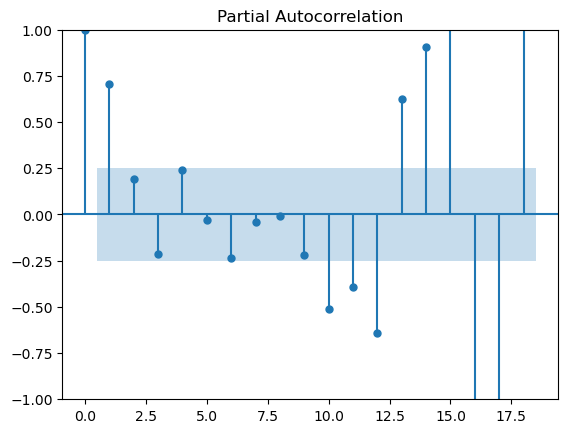

In [63]:
pacf = plot_pacf(airlines_df_1["Passengers Third Difference"].dropna())

In [64]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1999,12,1)
test_dataset_end=datetime(2002,12,1)

In [65]:
train_data=airlines_df_1[:train_dataset_end]
test_data=airlines_df_1[train_dataset_end+timedelta(days=1):test_dataset_end]

In [66]:
## create a SARIMA model as we are working with seasonal data
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(10,0,2),seasonal_order=(0,3,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

/Users/tarunvannelli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tarunvannelli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93024D+00    |proj g|=  1.21737D-01

At iterate    5    f=  1.89152D+00    |proj g|=  2.52432D-02

At iterate   10    f=  1.87373D+00    |proj g|=  1.43443D-02

At iterate   15    f=  1.84563D+00    |proj g|=  3.46618D-02

At iterate   20    f=  1.82431D+00    |proj g|=  6.67392D-03

At iterate   25    f=  1.79864D+00    |proj g|=  9.50013D-02

At iterate   30    f=  1.78178D+00    |proj g|=  2.23480D-02

At iterate   35    f=  1.77997D+00    |proj g|=  1.39254D-02

At iterate   40    f=  1.77972D+00    |proj g|=  1.53369D-03

At iterate   45    f=  1.77971D+00    |proj g|=  5.47547D-04

At iterate   50    f=  1.77971D+00    |proj g|=  2.27616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/tarunvannelli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   60
Model:             SARIMAX(10, 0, 2)x(0, 3, [], 12)   Log Likelihood                -106.783
Date:                              Sat, 14 Jan 2023   AIC                            239.565
Time:                                      12:27:58   BIC                            254.880
Sample:                                  01-01-1995   HQIC                           243.628
                                       - 12-01-1999                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5802      0.629      0.923      0.356      -0.652       1.812
ar.L2          0.4939      0.715      0.691      0.490      -0.907       1.895
ar.L3         -0.4803      0.616     -0.779      0.436      -1.688       0.728
ar.L4          0.1986      0.547      0.363      0.716      -0.873       1.270
ar.L5         -0.1637      0.484     -0.338      0.735      -1.112       0.785
ar.L6         -0.0070      0.479     -0.015      0.988      -0.945       0.931
ar.L7         -0.0393      0.585     -0.067      0.946      -1.185       1.106
ar.L8         -0.0790      0.319     -0.248      0.804      -0.704       0.546
ar.L9          0.3846      0.615      0.625      0.532      -0.821       1.590
ar.L10        -0.4763      0.439     -1.085      0.278      -1.337       0.384
ma.L1          0.2003     12.500      0.016      0.987     -24.299      24.700
ma.L2         -0.7817     10.190     -0.077      0.939     -20.754      19.191
sigma2        98.1833   1204.754      0.081      0.935   -2263.090    2459.457
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.27   Prob(JB):                         0.45
Heteroskedasticity (H):               0.92   Skew:                            -0.16
Prob(H) (two-sided):                  0.91   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2000-01-01 00:00:00
2002-12-01 00:00:00


In [69]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2000,1,1),end=datetime(2002,12,1))
MAE_Sarima = MAE(pred_Sarima, test_data['Passengers'])
MAE_Sarima

0.1603987332322756

In [70]:
#Compare the results 

data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE__hwe_mul_add","MAE_base","MAE_SARIMA"]),
        "MAE_Values":pd.Series([mae_linear,mae_exp,mae_quad,mae_add_sea,mae_add_sea_quad,mae_mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,MAE_base,MAE_Sarima])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
6,MAE_Mult_add_sea,0.024187
10,MAE__hwe_mul_add,0.028208
4,MAE_add_sea_quad,0.055711
9,MAE_hwe_add_add,0.057299
11,MAE_base,0.089354
1,MAE_Exp,0.111025
2,MAE_Quad,0.118382
0,MAE_linear,0.128759
7,MAE_ses,0.134113
12,MAE_SARIMA,0.160399


In [71]:
#Comparing mul seasonality and add trend predicted vales
#with the actual values
pred_Mult_add_sea

84    5.632141
85    5.647734
86    5.792098
87    5.756366
88    5.746648
89    5.865009
90    5.972273
91    5.972648
92    5.865485
93    5.738005
94    5.606271
95    5.744972
dtype: float64

In [72]:
cmp_df = pd.DataFrame(Test['Passengers'])
cmp_df['Forecast_Passengers'] = np.exp(pred_Mult_add_sea)
cmp_df

,Passengers,Forecast_Passengers
84,284,279.259237
85,277,283.647937
86,317,327.699745
87,313,316.197279
88,318,313.139118
89,374,352.485470
90,413,392.396393
91,405,392.543731
92,355,352.653113
93,306,310.444392


<AxesSubplot: >

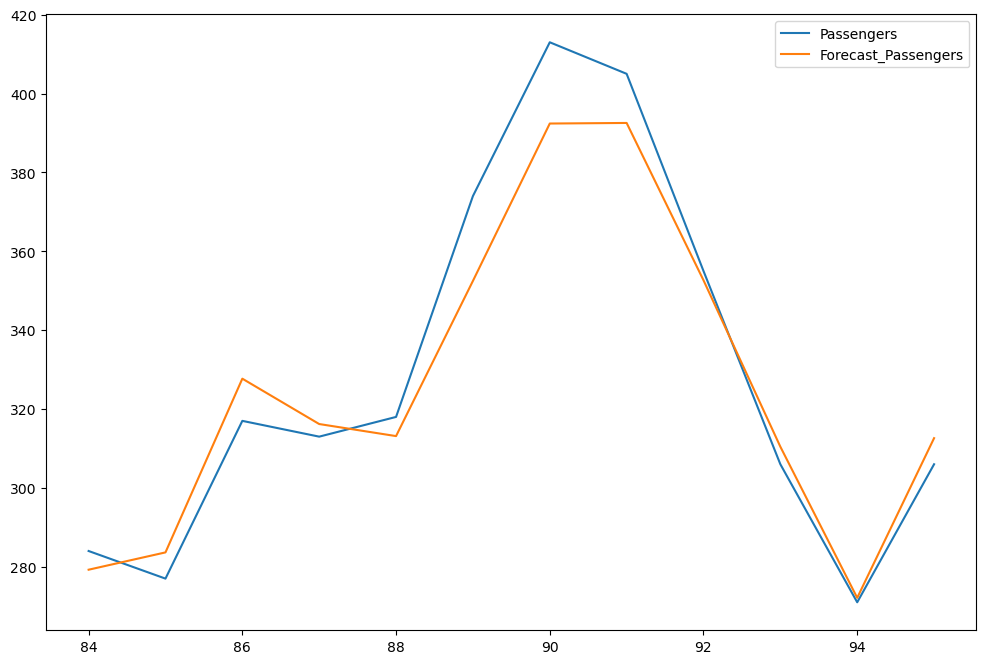

In [73]:
cmp_df[['Passengers','Forecast_Passengers']].plot(figsize=(12,8))